In [79]:
from ml_scratch__generate_dataset import gen_regression_data
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# generate data
X, y, weights = gen_regression_data(m=10, n=3)

In [105]:
from example_deep_learning_ann import learning_rate


class LinearRegressor():
    def __init__(self, sample_size=None, n_features=None, 
                 learning_rate=0.0001, n_iters=1, early_stop = 2):
        self.weights = None 
        self.bias = None 
        self.m = sample_size 
        self.n = n_features 
        self.LearningRate = learning_rate 
        self.n_iters = n_iters
        self.early_stop = early_stop
        self.loss_history = []

       
    def initialize(self, random_seed = 1):
        np.random.seed(random_seed)
        self.weights = np.random.randn(self.n, 1)*0.1
        self.bias = 0
        self.loss_history = []
    
    def calculate_loss(self, y, y_pred):
        " 1/m sum (y_pred - y)**2"
        _loss = 1/2 * np.mean((y_pred - y)**2)
        return _loss 
    
    def get_gradients(self, X, y, y_pred):
        """
        y_pred = Wx + b
        L = 1/2m * sum((y_pred - y)**2)
        dw = 1/m sum[(y_pred-y)*x] 
        db = 1/m sum[(y_pred-y)]
        """ 
        dw = np.mean((y_pred - y)*X, axis=1, keepdims=True) #(n, 1)
        db = np.mean((y_pred - y), axis=1, keepdims=True)
        return dw, db 
    
    def update_parameters(self, dw, db):
        self.weights -= self.LearningRate*dw 
        self.bias -= self.LearningRate*db 
    
    def predict(self, X):
        return np.dot(self.weights.T, X) + self.bias 

        
    def train(self, X, y, n_iters=None, learning_rate=None, early_stop=None):
        """
        X: (features, observations)
        y: (1, observartions)
        """
        X = X.T
        self.n, self.m = X.shape 
        if n_iters:
            self.n_iters = n_iters 
        if learning_rate:
            self.LearningRate = learning_rate
        if early_stop:
            self.early_stop = early_stop
        
        self.initialize()
        
        y_pred = self.predict(X)
        loss = self.calculate_loss(y, y_pred)
        self.loss_history.append(loss)
        
        print(f"-- epoch:{0}, loss:{loss:0.4f}")
        early_stop = 0 
        
        for epoch in range(1, self.n_iters+1):
            dw, db = self.get_gradients(X, y, y_pred)
            self.update_parameters(dw, db)
            y_pred = self.predict(X)
            loss = self.calculate_loss(y, y_pred)
            self.loss_history.append(loss)
            if epoch % 10 == 0 or epoch == self.n_iters:
                print(f"-- epoch:{epoch}, loss:{loss:0.4f}") 
            
            if self.loss_history[-1] >= self.loss_history[-2]:
                early_stop += 1
            if early_stop >= self.early_stop:
                print(f"Stoping early as it meet the condition.")
                break 

In [110]:
ll = LinearRegressor(n_iters=1000, learning_rate=0.0001,early_stop=2)
ll.train(X,y)


-- epoch:0, loss:755.1398
-- epoch:10, loss:0.2407
-- epoch:20, loss:0.0433
-- epoch:30, loss:0.0430
-- epoch:40, loss:0.0430
-- epoch:50, loss:0.0429
-- epoch:60, loss:0.0429
-- epoch:70, loss:0.0429
-- epoch:80, loss:0.0428
-- epoch:90, loss:0.0428
-- epoch:100, loss:0.0427
-- epoch:110, loss:0.0427
-- epoch:120, loss:0.0426
-- epoch:130, loss:0.0426
-- epoch:140, loss:0.0426
-- epoch:150, loss:0.0425
-- epoch:160, loss:0.0425
-- epoch:170, loss:0.0424
-- epoch:180, loss:0.0424
-- epoch:190, loss:0.0423
-- epoch:200, loss:0.0423
-- epoch:210, loss:0.0423
-- epoch:220, loss:0.0422
-- epoch:230, loss:0.0422
-- epoch:240, loss:0.0421
-- epoch:250, loss:0.0421
-- epoch:260, loss:0.0420
-- epoch:270, loss:0.0420
-- epoch:280, loss:0.0420
-- epoch:290, loss:0.0419
-- epoch:300, loss:0.0419
-- epoch:310, loss:0.0418
-- epoch:320, loss:0.0418
-- epoch:330, loss:0.0418
-- epoch:340, loss:0.0417
-- epoch:350, loss:0.0417
-- epoch:360, loss:0.0416
-- epoch:370, loss:0.0416
-- epoch:380, loss:0.

(10,) (10,)


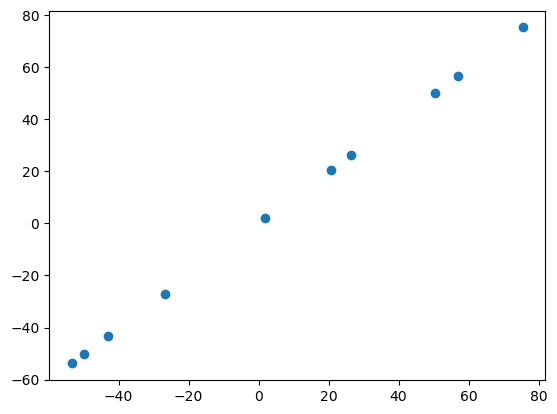

In [111]:
y_pred = ll.predict(X.T).flatten()
print(y.shape, y_pred.shape)
plt.scatter(x=y, y=y_pred)
plt.show()


In [112]:
print(ll.weights, ll.bias)
print(weights)

[[0.72302464]
 [0.00191251]
 [0.29785493]] [[0.02115038]]
[0.417 0.72  0.    0.302]


In [113]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y, y_pred=y_pred)

0.07811542071202249